<a href="https://colab.research.google.com/github/eladcohen333/MNIST/blob/main/MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#load data


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')


11501568/11490434 [==============================] - 0s 0us/step


#normalzution

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [5]:
num_classes = 10
input_shape = (28,28,1)

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

#1.regression logistic


In [13]:

from tensorflow.python.keras.backend import shape
model = keras.Sequential([
                          keras.Input(shape=input_shape),
                          layers.Flatten(),
                          layers.Dense(num_classes, activation=tf.nn.softmax)


])
model.summary()
batch_size = 100
epochs = 12
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#Run model and results

In [14]:
%%time
model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = .1) 
print("*************************************")
score = model.evaluate(X_test, y_test)
score_train  = model.evaluate(X_train, y_train)
f1_train  = 2*(score_train[2]*score_train[3])/(score_train[2]+score_train[3])
f1_test = 2*(score[2]*score[3])/(score[2]+score[3])

print("Summary Model ")
print('train loss: {}'.format(score_train[0]))
print('train acc: {}'.format(score_train[1]))
print('train precision: {}'.format(score_train[2]))
print('train recall: {}'.format(score_train[3]))
print('train F1', f1_train)

print("*************************************")
print('test loss: {}'.format(score[0]))
print('test acc: {}'.format(score[1]))
print('test precision: {}'.format(score[2]))
print('test recall: {}'.format(score[3]))
print('test F1', f1_test)

print("*************************************")
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print('test weights ',weights)
print('test biases ',biases)

Epoch 1/12
540/540 [==============================] - 4s 5ms/step - loss: 0.6591 - acc: 0.8348 - precision_3: 0.9487 - recall_3: 0.6695 - val_loss: 0.3271 - val_acc: 0.9177 - val_precision_3: 0.9583 - val_recall_3: 0.8728
Epoch 2/12
540/540 [==============================] - 3s 5ms/step - loss: 0.3604 - acc: 0.9020 - precision_3: 0.9400 - recall_3: 0.8626 - val_loss: 0.2724 - val_acc: 0.9258 - val_precision_3: 0.9525 - val_recall_3: 0.9018
Epoch 3/12
540/540 [==============================] - 2s 5ms/step - loss: 0.3204 - acc: 0.9117 - precision_3: 0.9395 - recall_3: 0.8842 - val_loss: 0.2540 - val_acc: 0.9290 - val_precision_3: 0.9507 - val_recall_3: 0.9090
Epoch 4/12
540/540 [==============================] - 3s 5ms/step - loss: 0.3017 - acc: 0.9160 - precision_3: 0.9395 - recall_3: 0.8935 - val_loss: 0.2434 - val_acc: 0.9353 - val_precision_3: 0.9539 - val_recall_3: 0.9167
Epoch 5/12
540/540 [==============================] - 2s 5ms/step - loss: 0.2905 - acc: 0.9193 - precision_3: 0.

IndexError: ignored

#2. regression logistic + 2 layers




In [15]:

from tensorflow.python.keras.backend import shape
model =keras.Sequential([
                         keras.Input(shape=input_shape),
                         layers.Dense(200, activation='relu'),
                         layers.Dense(200, activation='relu'),
                         layers.Flatten(),
                         layers.Dense(num_classes, activation=tf.nn.softmax)


])
model.summary()
batch_size = 100
epochs = 12
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 28, 28, 200)       400       
                                                                 
 dense_7 (Dense)             (None, 28, 28, 200)       40200     
                                                                 
 flatten_4 (Flatten)         (None, 156800)            0         
                                                                 
 dense_8 (Dense)             (None, 10)                1568010   
                                                                 
Total params: 1,608,610
Trainable params: 1,608,610
Non-trainable params: 0
_________________________________________________________________


#Run model and results

In [16]:
%%time
model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = .1) 
print("*************************************")
score = model.evaluate(X_test, y_test)
score_train  = model.evaluate(X_train, y_train)
f1_train  = 2*(score_train[2]*score_train[3])/(score_train[2]+score_train[3])
f1_test = 2*(score[2]*score[3])/(score[2]+score[3])

print("Summary Model ")
print('train loss: {}'.format(score_train[0]))
print('train acc: {}'.format(score_train[1]))
print('train precision: {}'.format(score_train[2]))
print('train recall: {}'.format(score_train[3]))
print('train F1', f1_train)

print("*************************************")
print('test loss: {}'.format(score[0]))
print('test acc: {}'.format(score[1]))
print('test precision: {}'.format(score[2]))
print('test recall: {}'.format(score[3]))
print('test F1', f1_test)

print("*************************************")
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print('test weights ',weights)
print('test biases ',biases)

Epoch 1/12
540/540 [==============================] - 27s 48ms/step - loss: 0.3631 - acc: 0.8958 - precision_4: 0.9217 - recall_4: 0.8699 - val_loss: 0.2447 - val_acc: 0.9315 - val_precision_4: 0.9448 - val_recall_4: 0.9178
Epoch 2/12
540/540 [==============================] - 25s 46ms/step - loss: 0.2913 - acc: 0.9184 - precision_4: 0.9341 - recall_4: 0.9041 - val_loss: 0.2305 - val_acc: 0.9345 - val_precision_4: 0.9466 - val_recall_4: 0.9248
Epoch 3/12
540/540 [==============================] - 25s 47ms/step - loss: 0.2760 - acc: 0.9226 - precision_4: 0.9380 - recall_4: 0.9093 - val_loss: 0.2237 - val_acc: 0.9400 - val_precision_4: 0.9513 - val_recall_4: 0.9308
Epoch 4/12
540/540 [==============================] - 25s 47ms/step - loss: 0.2584 - acc: 0.9281 - precision_4: 0.9411 - recall_4: 0.9164 - val_loss: 0.2131 - val_acc: 0.9412 - val_precision_4: 0.9531 - val_recall_4: 0.9323
Epoch 5/12
540/540 [==============================] - 25s 47ms/step - loss: 0.2351 - acc: 0.9329 - preci

#3. convolution


In [17]:
model = keras.Sequential([
                          keras.Input(shape=input_shape),
                          layers.Conv2D(32, kernel_size=(3,3),padding='same',strides=1),
                          layers.MaxPooling2D(pool_size=(2,2),strides=2),
                          layers.Dense(1024, activation=tf.keras.activations.relu),
                          layers.Flatten(),
                          layers.Dense(num_classes, activation=tf.nn.softmax)

])
model.summary()
batch_size = 100
epochs = 12
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dense_9 (Dense)             (None, 14, 14, 1024)      33792     
                                                                 
 flatten_5 (Flatten)         (None, 200704)            0         
                                                                 
 dense_10 (Dense)            (None, 10)                2007050   
                                                                 
Total params: 2,041,162
Trainable params: 2,041,162
Non-trainable params: 0
____________________________________________

#Run model and results

In [18]:
%%time
model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          # X_val, y_val)
          validation_split = .1) #validation_date=(X_val, y_val)
print("*************************************")
score = model.evaluate(X_test, y_test)
score_train  = model.evaluate(X_train, y_train)
f1_train  = 2*(score_train[2]*score_train[3])/(score_train[2]+score_train[3])
f1_test = 2*(score[2]*score[3])/(score[2]+score[3])

print("Summary Model ")
print('train loss: {}'.format(score_train[0]))
print('train acc: {}'.format(score_train[1]))
print('train precision: {}'.format(score_train[2]))
print('train recall: {}'.format(score_train[3]))
print('train F1', f1_train)

print("*************************************")
print('test loss: {}'.format(score[0]))
print('test acc: {}'.format(score[1]))
print('test precision: {}'.format(score[2]))
print('test recall: {}'.format(score[3]))
print('test F1', f1_test)

print("*************************************")
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print('test weights ',weights)
print('test biases ',biases)

Epoch 1/12
540/540 [==============================] - 26s 34ms/step - loss: 0.1647 - acc: 0.9507 - precision_5: 0.9661 - recall_5: 0.9377 - val_loss: 0.0646 - val_acc: 0.9822 - val_precision_5: 0.9838 - val_recall_5: 0.9807
Epoch 2/12
540/540 [==============================] - 17s 32ms/step - loss: 0.0569 - acc: 0.9826 - precision_5: 0.9845 - recall_5: 0.9810 - val_loss: 0.0493 - val_acc: 0.9873 - val_precision_5: 0.9880 - val_recall_5: 0.9855
Epoch 3/12
540/540 [==============================] - 17s 32ms/step - loss: 0.0402 - acc: 0.9875 - precision_5: 0.9890 - recall_5: 0.9865 - val_loss: 0.0519 - val_acc: 0.9872 - val_precision_5: 0.9886 - val_recall_5: 0.9863
Epoch 4/12
540/540 [==============================] - 17s 32ms/step - loss: 0.0277 - acc: 0.9914 - precision_5: 0.9922 - recall_5: 0.9907 - val_loss: 0.0529 - val_acc: 0.9870 - val_precision_5: 0.9881 - val_recall_5: 0.9863
Epoch 5/12
540/540 [==============================] - 17s 32ms/step - loss: 0.0214 - acc: 0.9930 - preci

#4. convolution add layer






In [19]:
model = keras.Sequential([
                          keras.Input(shape=input_shape),
                          layers.Conv2D(32, kernel_size=(3,3),padding='same',strides=1),
                          layers.Conv2D(64, kernel_size=(5,5),padding='same',strides=1),
                          layers.MaxPooling2D(pool_size=(2,2),strides=2),
                          layers.Dense(1024, activation=tf.keras.activations.relu),
                          layers.Flatten(),
                          layers.Dense(num_classes, activation=tf.nn.softmax)

])
model.summary()
batch_size = 100
epochs = 12
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dense_11 (Dense)            (None, 14, 14, 1024)      66560     
                                                                 
 flatten_6 (Flatten)         (None, 200704)            0         
                                                                 
 dense_12 (Dense)            (None, 10)                2007050   
                                                      

#Run model and results

In [20]:
%%time
model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = .1) 


print("*************************************")
score = model.evaluate(X_test, y_test)
score_train  = model.evaluate(X_train, y_train)
f1_train  = 2*(score_train[2]*score_train[3])/(score_train[2]+score_train[3])
f1_test = 2*(score[2]*score[3])/(score[2]+score[3])

print("Summary Model ")
print('train loss: {}'.format(score_train[0]))
print('train acc: {}'.format(score_train[1]))
print('train precision: {}'.format(score_train[2]))
print('train recall: {}'.format(score_train[3]))
print('train F1', f1_train)

print("*************************************")
print('test loss: {}'.format(score[0]))
print('test acc: {}'.format(score[1]))
print('test precision: {}'.format(score[2]))
print('test recall: {}'.format(score[3]))
print('test F1', f1_test)

print("*************************************")
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print('test weights ',weights)
print('test biases ',biases)

Epoch 1/12
540/540 [==============================] - 24s 42ms/step - loss: 0.1342 - acc: 0.9594 - precision_6: 0.9703 - recall_6: 0.9520 - val_loss: 0.0527 - val_acc: 0.9842 - val_precision_6: 0.9860 - val_recall_6: 0.9827
Epoch 2/12
540/540 [==============================] - 22s 40ms/step - loss: 0.0463 - acc: 0.9856 - precision_6: 0.9868 - recall_6: 0.9844 - val_loss: 0.0496 - val_acc: 0.9867 - val_precision_6: 0.9883 - val_recall_6: 0.9858
Epoch 3/12
540/540 [==============================] - 22s 40ms/step - loss: 0.0328 - acc: 0.9895 - precision_6: 0.9901 - recall_6: 0.9889 - val_loss: 0.0432 - val_acc: 0.9897 - val_precision_6: 0.9905 - val_recall_6: 0.9892
Epoch 4/12
540/540 [==============================] - 22s 41ms/step - loss: 0.0228 - acc: 0.9926 - precision_6: 0.9931 - recall_6: 0.9923 - val_loss: 0.0453 - val_acc: 0.9878 - val_precision_6: 0.9888 - val_recall_6: 0.9872
Epoch 5/12
540/540 [==============================] - 22s 40ms/step - loss: 0.0175 - acc: 0.9943 - preci

#5. convolution with Dropout


In [21]:
from tensorflow.python.ops.gen_nn_ops import relu
from re import M
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.ops.nn_ops import dropout

model = keras.Sequential([
                          keras.Input(shape=input_shape),
                          layers.Conv2D(32, kernel_size=(3,3),padding='same',strides=1),
                          layers.Conv2D(32, kernel_size=(5,5),padding='same',strides=1),
                          layers.MaxPooling2D(pool_size=(2,2),strides=2),
                          layers.Dense(1024, activation=tf.keras.activations.relu),
                          layers.Dropout(.5),
                          layers.Flatten(),
                          layers.Dense(num_classes, activation=tf.nn.softmax)

])
model.summary()
batch_size = 100
epochs = 12
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dense_13 (Dense)            (None, 14, 14, 1024)      33792     
                                                                 
 dropout (Dropout)           (None, 14, 14, 1024)      0         
                                                                 
 flatten_7 (Flatten)         (None, 200704)            0         
                                                      

#Run model and results

In [22]:
%%time
model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = .1) 


print("*************************************")
score = model.evaluate(X_test, y_test)
score_train  = model.evaluate(X_train, y_train)
f1_train  = 2*(score_train[2]*score_train[3])/(score_train[2]+score_train[3])
f1_test = 2*(score[2]*score[3])/(score[2]+score[3])

print("Summary Model ")
print('train loss: {}'.format(score_train[0]))
print('train acc: {}'.format(score_train[1]))
print('train precision: {}'.format(score_train[2]))
print('train recall: {}'.format(score_train[3]))
print('train F1', f1_train)

print("*************************************")
print('test loss: {}'.format(score[0]))
print('test acc: {}'.format(score[1]))
print('test precision: {}'.format(score[2]))
print('test recall: {}'.format(score[3]))
print('test F1', f1_test)

print("*************************************")
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print('test weights ',weights)
print('test biases ',biases)

Epoch 1/12
540/540 [==============================] - 26s 46ms/step - loss: 0.1425 - acc: 0.9579 - precision_7: 0.9692 - recall_7: 0.9486 - val_loss: 0.0565 - val_acc: 0.9842 - val_precision_7: 0.9873 - val_recall_7: 0.9823
Epoch 2/12
540/540 [==============================] - 24s 44ms/step - loss: 0.0535 - acc: 0.9837 - precision_7: 0.9852 - recall_7: 0.9826 - val_loss: 0.0546 - val_acc: 0.9868 - val_precision_7: 0.9878 - val_recall_7: 0.9858
Epoch 3/12
540/540 [==============================] - 24s 45ms/step - loss: 0.0393 - acc: 0.9874 - precision_7: 0.9884 - recall_7: 0.9866 - val_loss: 0.0379 - val_acc: 0.9895 - val_precision_7: 0.9906 - val_recall_7: 0.9887
Epoch 4/12
540/540 [==============================] - 24s 44ms/step - loss: 0.0279 - acc: 0.9910 - precision_7: 0.9916 - recall_7: 0.9904 - val_loss: 0.0503 - val_acc: 0.9862 - val_precision_7: 0.9873 - val_recall_7: 0.9858
Epoch 5/12
540/540 [==============================] - 25s 45ms/step - loss: 0.0263 - acc: 0.9918 - preci



#Visualization the  best convolution





before model


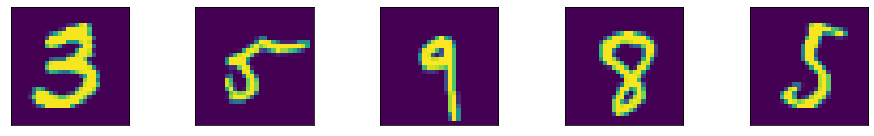

after model


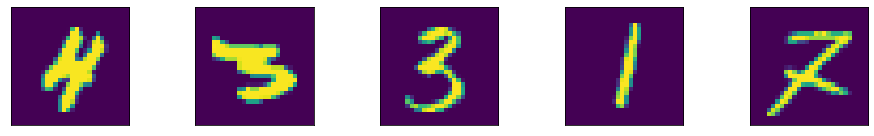

In [23]:
import random


def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

print("before model")
plt.figure(figsize=(16, 10))
for i in range(5):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(image.reshape((1, 28, 28, 1))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

print("after model")

plt.figure(figsize=(16, 10))
for i in range(5):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()